# My Assement for Pyber Data 2016
### Analysis 

* Rural Areas had less drivers and riders of Pyber ride sharing. This could be as a result of varied distance of rides in provincial zones.  Drivers in rural areas only make up 1% of the total drivers while rural areas account for roughly 6% of total fares and rides. Projection coming from the data points also shows average fare above what is experienced in the city.

* The bubble plot demonstrates that number of rides and drives both are more in urban communities when contrasted with suburban, and rural cities. Albeit average fare is more for suburban and rural cities for few instances.

* Each of the three pie charts show that urban cities have a decent level of percentage of total fare, total rides and total drivers, which, all things considered, circumstance probably won't be the best of benefit making edge.

* From this examination, this can be predicated that there are numerous new chances tit terms of enlisting more drivers to work in these urban communities.it terms of hiring more drivers to operate in these cities.

In [56]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
ride_df = pd.read_csv("ride_data.csv")
city_df = pd.read_csv("city_data.csv") 

In [57]:
#drop one duplicate record with same city name, same ride_ids but different # of drivers
city_df = city_df.drop_duplicates('city', keep = 'first')

#merge
merged_df = city_df.merge(ride_df, on = 'city')

In [58]:
#merged_df.head()

## Bubble Plot of Ride Sharing Data

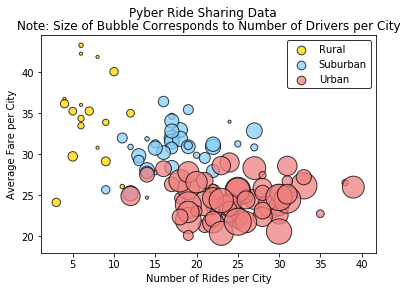

In [64]:
#Group by city name
by_city = merged_df.groupby('city')

# Average fare by city
avg_fare = by_city.mean()['fare']

# Rides by city
ride_count = by_city['ride_id'].count()

# Number of drivers
driver_count = by_city.mean()['driver_count']

# city type data
city_type = city_df.set_index('city')['type']

# dataframe from above series
city_info = pd.DataFrame({
    "Number of Rides": ride_count,
    "Average Fare": avg_fare,
    "Number of Drivers": driver_count,
    "Type of City": city_type
})

city_info.sort_values('Number of Drivers', ascending = False)

#separating Dataframe from city categories
rural = city_info[city_info['Type of City'] == 'Rural']
suburban = city_info[city_info['Type of City'] == 'Suburban']
urban = city_info[city_info['Type of City'] == 'Urban']

#Color Dictionary 
city_color = {'Urban': color_scheme['Light Coral'], 'Suburban': color_scheme['Light Sky Blue'], 'Rural': color_scheme['Gold']}

plt.suptitle('Pyber Ride Sharing Data')

# Scatter plots for Rural, Suburban and Urban city type
plt.scatter(rural['Number of Rides'], rural['Average Fare'], s = rural['Number of Drivers']*10, color = city_color['Rural'], edgecolor = 'black', label = 'Rural', alpha = .75)
plt.scatter(suburban['Number of Rides'], suburban['Average Fare'], s = suburban['Number of Drivers']*10, color = city_color['Suburban'], edgecolor = 'black', label = 'Suburban', alpha = .75)
plt.scatter(urban['Number of Rides'], urban['Average Fare'], s = urban['Number of Drivers']*10, color = city_color['Urban'], edgecolor = 'black', label = 'Urban', alpha = .75)

#print scatter plot
plt.title('Note: Size of Bubble Corresponds to Number of Drivers per City')
plt.xlabel('Number of Rides per City')
plt.ylabel('Average Fare per City')

#Legend
leg = plt.legend(frameon = True, edgecolor = 'black')
leg.legendHandles[0]._sizes = [75]
leg.legendHandles[1]._sizes = [75]
leg.legendHandles[2]._sizes = [75]

plt.show()


## Total Fares by City Type

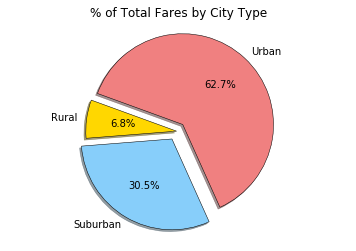

In [60]:
#group by type to be used by all pie charts
by_type = merged_df.groupby('type')['type', 'fare', 'ride_id', 'driver_count']

#total fare by city
fare_sum = by_type.sum()['fare']

#pie chart build
labels = fare_sum.index

#colors and exploe the same for all pie charts, reference here
colors = [city_color[n] for n in labels]
explode = [0.0 , 0.1, 0.1]
plt.pie(fare_sum, startangle = 160, colors = colors, explode = explode, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})

#pie chart display
plt.title('% of Total Fares by City Type')
plt.axis('equal')

# Show Figure
plt.show()

## Total Rides by City Type

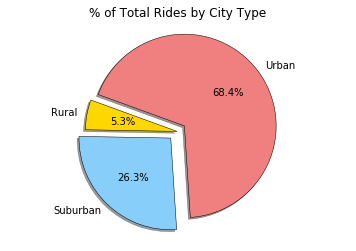

In [61]:
# Ride per city type
ride_sum = by_type.count()['ride_id']

labels = ride_sum.index
explode = [0.0 , 0.1, 0.1]
plt.pie(ride_sum, startangle = 160, explode = explode, colors = colors, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
plt.title('% of Total Rides by City Type')
plt.axis('equal')

# Show Figure
plt.show()

## Total Drivers by City Type

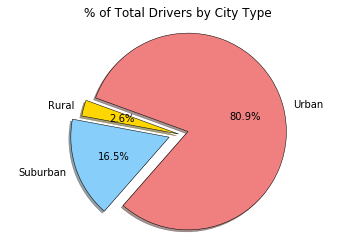

In [62]:
# Driver per city type

driver_sum = city_df.groupby('type').sum()['driver_count']

labels = driver_sum.index
explode = [0.0 , 0.1, 0.1]
plt.pie(driver_sum, startangle = 160, explode = explode, colors = colors, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
plt.title('% of Total Drivers by City Type')
plt.axis('equal')

# Show Figure
plt.show()